# Project 4: Toyota Car Dataset



We are going to use the Toyota car dataset. In this kernel we are going to analyse, visualize and predict using Mercedes data set and using some methods like linear regression, polynominal regression etc.

Content :

1. Importing dataset and exploration

2. Data Preperation and Visualization



# 1. Importing dataset and exploration
Importing the packages needed for the analysis.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
ty = pd.read_csv("/Users/tranngocmai/Documents/DATA SCIENCE/python/project/toyota.csv")

In [9]:
ty.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [10]:
ty.shape

(6738, 9)

In [19]:
ty.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [11]:
ty.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [12]:
ty.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Exploratory data analysis

# 2. Data Preperation and Visualization

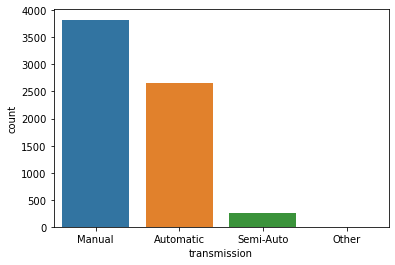

In [14]:
sns.countplot(ty["transmission"])

Most of the cars on the dataset are with manual and automatic transmission with very few cars in semi automatic transmission

 Yaris            0.314930
 Aygo             0.291036
 Auris            0.105669
 C-HR             0.071089
 RAV4             0.070199
 Corolla          0.039626
 Prius            0.034432
 Avensis          0.017067
 Verso            0.016919
 Hilux            0.012763
 GT86             0.010834
 Land Cruiser     0.007569
 PROACE VERSO     0.002226
 Supra            0.001781
 Camry            0.001633
 IQ               0.001187
 Urban Cruiser    0.000594
 Verso-S          0.000445
Name: model, dtype: float64


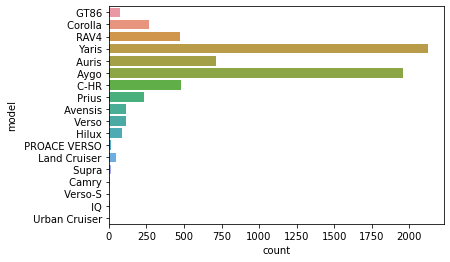

In [15]:
print(ty["model"].value_counts() / len(ty))
sns.countplot(y = ty["model"])

Top 3 cars are Yaris, Aygo and Auris on the dataset constuite 70% of all the Toyota cars, with all other cars contributing to 30%

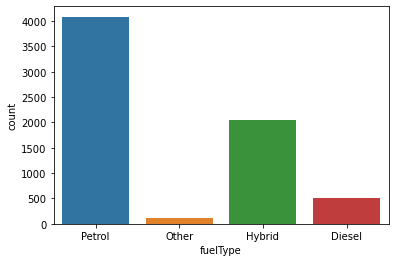

In [16]:
sns.countplot(ty["fuelType"])

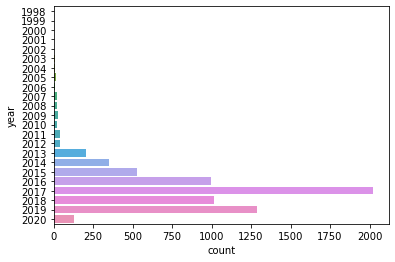

In [17]:
sns.countplot(y = ty["year"])

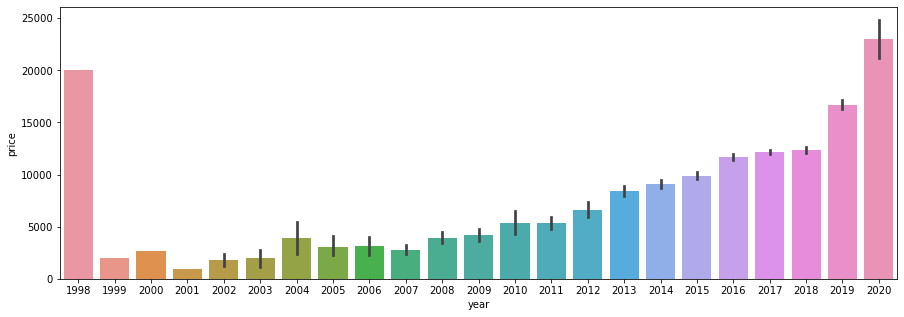

In [18]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.barplot(x = ty["year"], y = ty["price"])

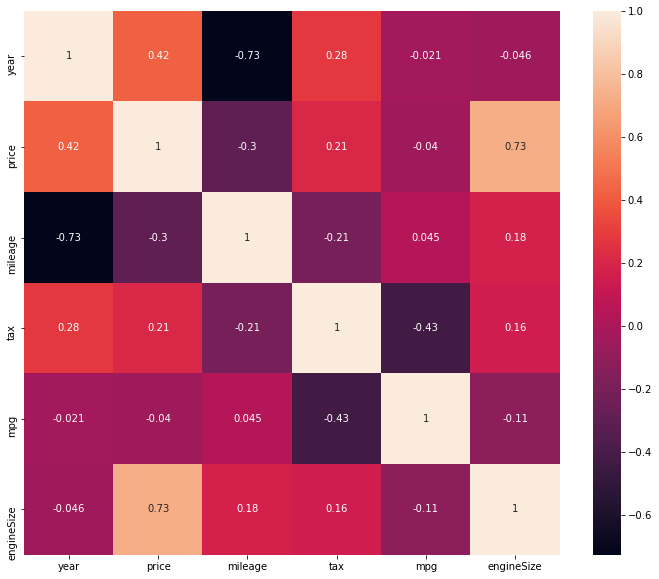

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(ty.corr(),annot=True)

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

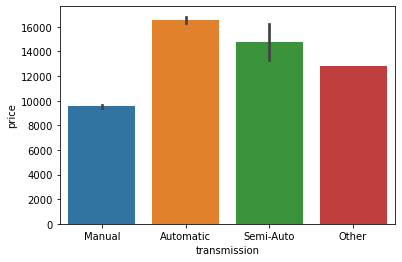

In [23]:
sns.barplot(x = ty["transmission"], y = ty["price"])

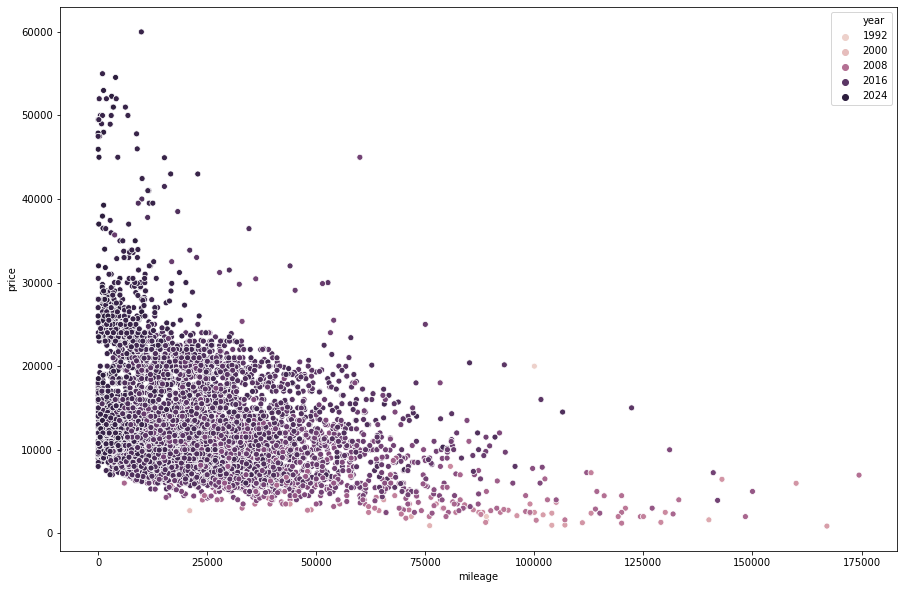

In [24]:
plt.figure(figsize=(15,10),facecolor='w') 
sns.scatterplot(ty["mileage"], ty["price"], hue = ty["year"])

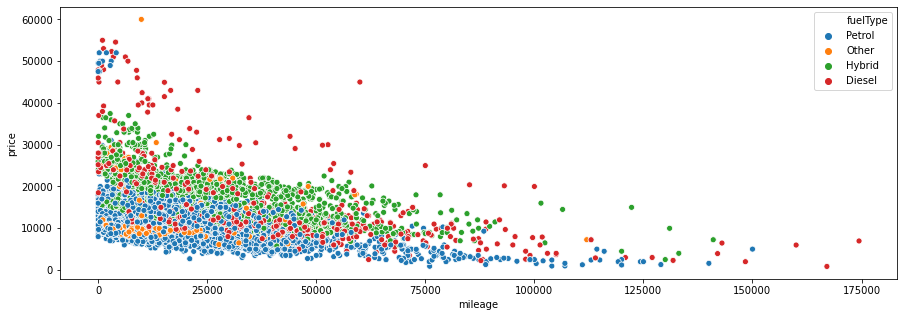

In [25]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.scatterplot(ty["mileage"], ty["price"], hue = ty["fuelType"])

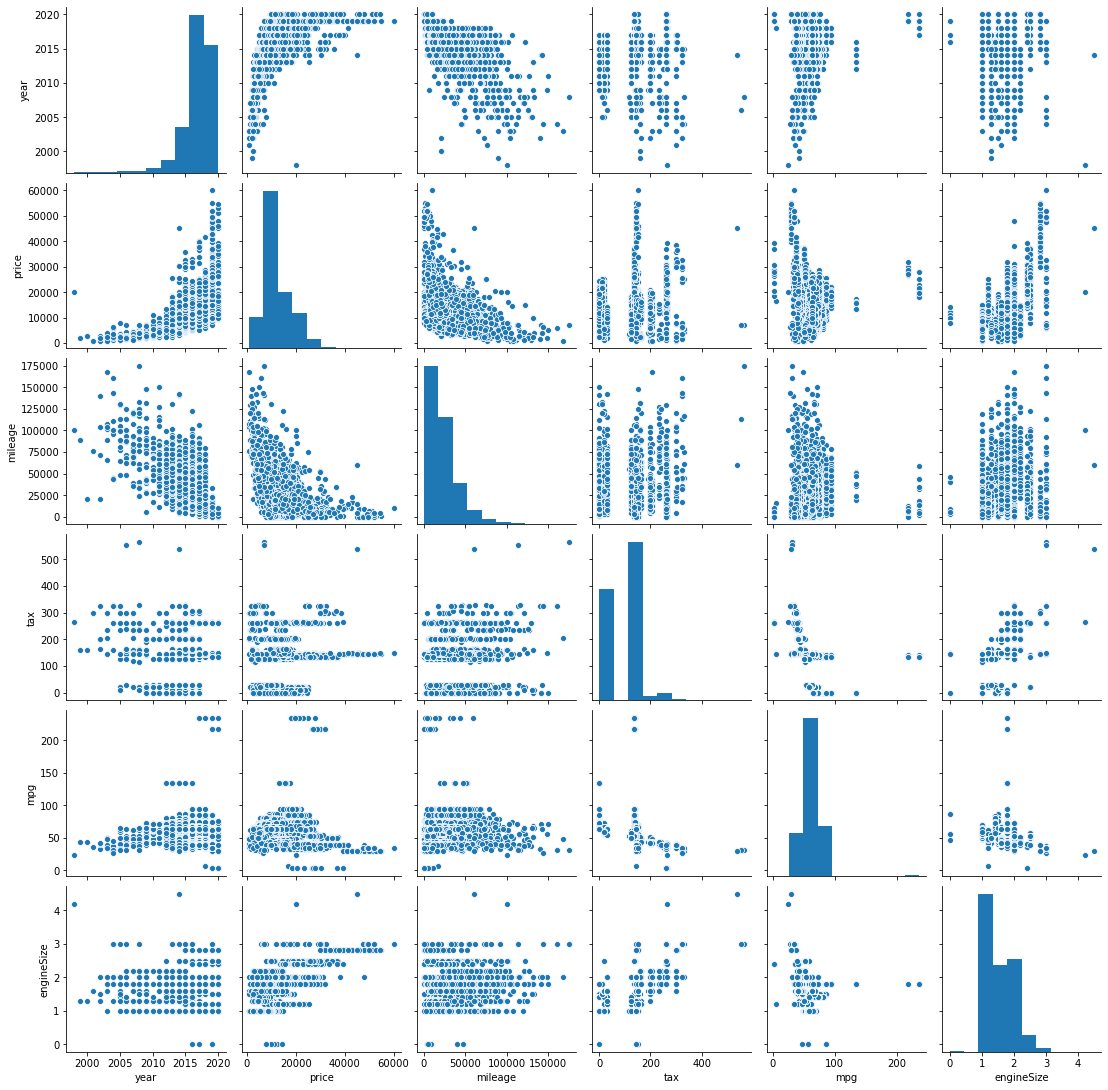

In [26]:
sns.pairplot(ty)

# 3. Machine Learning (Regression)

In [27]:
ty["age_of_car"] = 2020 - ty["year"]
ty.sample(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,age_of_car
6194,Prius,2013,13495,Automatic,84553,Hybrid,0,68.9,1.8,7
1011,Yaris,2017,8695,Manual,28204,Petrol,145,58.9,1.5,3
1742,Yaris,2018,11171,Manual,11231,Petrol,150,58.9,1.5,2
1743,Yaris,2019,12803,Manual,5800,Petrol,145,47.9,1.5,1
5417,Aygo,2016,8475,Automatic,10488,Petrol,0,67.0,1.0,4
6187,Prius,2013,16995,Automatic,48597,Hybrid,0,68.9,1.8,7
5673,C-HR,2018,23490,Automatic,5000,Hybrid,135,74.3,1.8,2
2339,Yaris,2019,11836,Manual,2732,Petrol,145,47.9,1.5,1
6000,C-HR,2017,21975,Automatic,23552,Hybrid,0,74.3,1.8,3
1685,Yaris,2013,5998,Manual,42741,Petrol,125,51.4,1.3,7
